In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [3]:
sales_df = pd.read_csv('sales_data.csv')
sales_df

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


In [4]:
sales_df.describe()

,Unnamed: 0,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000,7829.000000
mean,3914.000000,7.819480,2.501597,19.709905
std,2260.181962,5.388088,1.122722,17.446680
min,0.000000,0.190000,1.000000,0.190000
25%,1957.000000,3.990000,1.000000,6.570000
50%,3914.000000,7.190000,3.000000,14.970000
75%,5871.000000,11.190000,4.000000,28.470000
max,7828.000000,23.990000,4.000000,95.960000


In [42]:
def plot_continous_variables(data= None,column=None,hue=None,height=8):
    _=sns.displot(data=data,x=column,kde=True,hue=hue,height=height,aspect=height/5,bins=30)


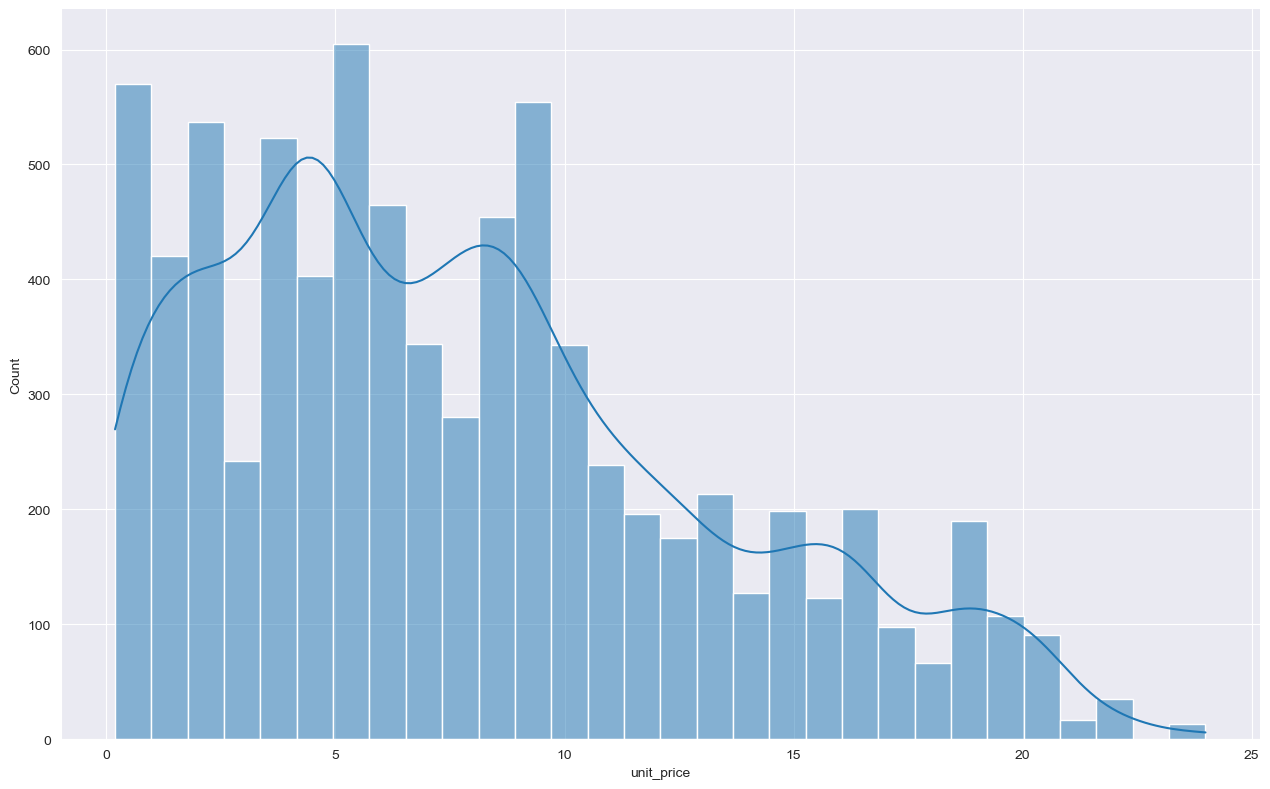

In [43]:
plot_continous_variables(sales_df,column='unit_price')

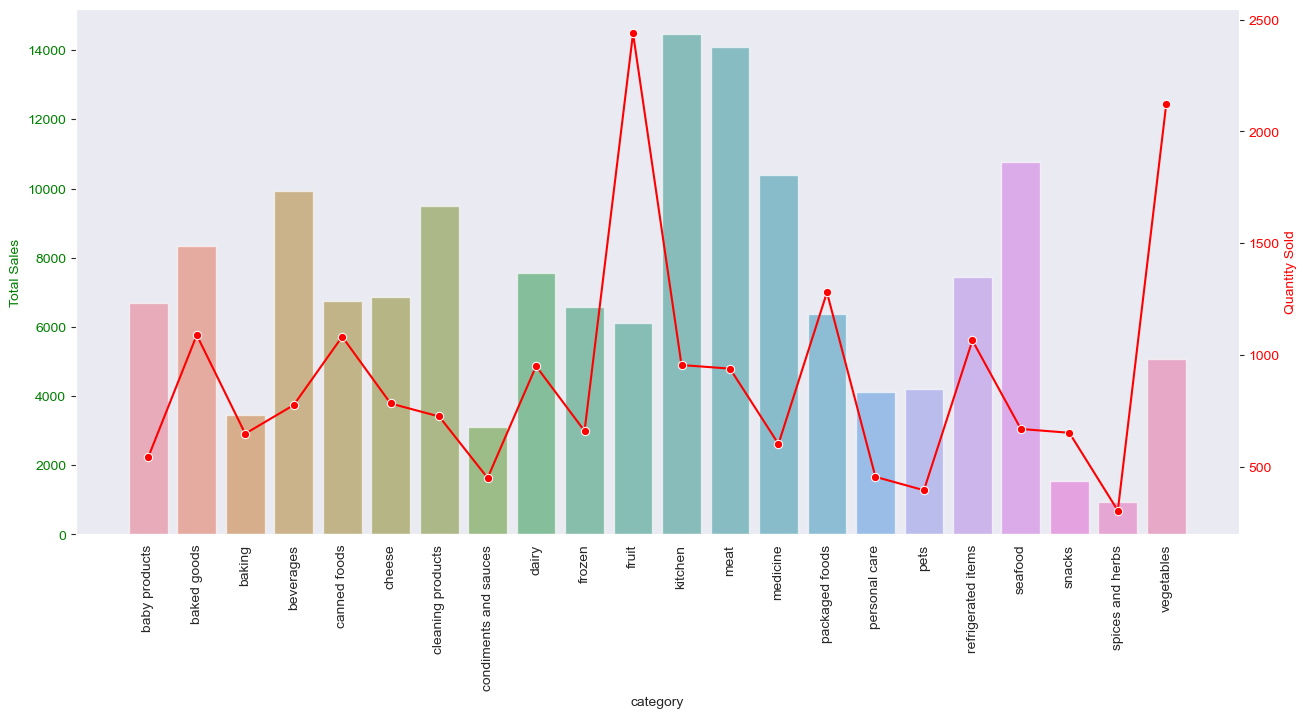

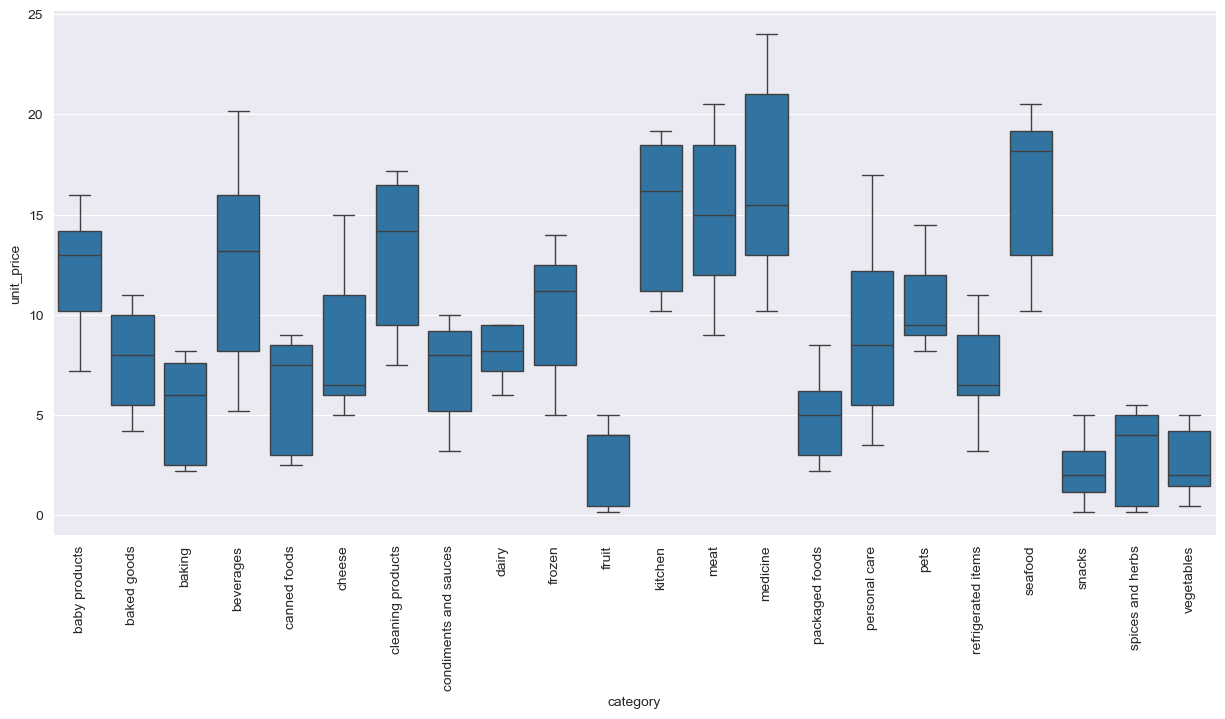

In [7]:
catagorical_sales_total = sales_df.groupby('category')['total'].sum().reset_index()
catagorical_quantity = sales_df.groupby('category')['quantity'].sum().reset_index()
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
ax1 = sns.barplot(x='category', y='total', data=catagorical_sales_total, alpha=0.6,hue='category')
ax1.set_ylabel('Total Sales', color='g')
ax1.tick_params(axis='y', labelcolor='g')
plt.xticks(rotation=90)
ax1.grid(False)

ax2 = ax1.twinx()

sns.lineplot(x='category', y='quantity', data=catagorical_quantity, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Quantity Sold', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.grid(False)
plt.show()
plt.figure(figsize=(15,15))

plt.subplot(2,1,2)
sns.boxplot(x=sales_df['category'],y=sales_df['unit_price'],order=sorted(sales_df['category']))
plt.xticks(rotation=90)
plt.show()

In [8]:
sales_df

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


<Axes: xlabel='customer_type', ylabel='quantity'>

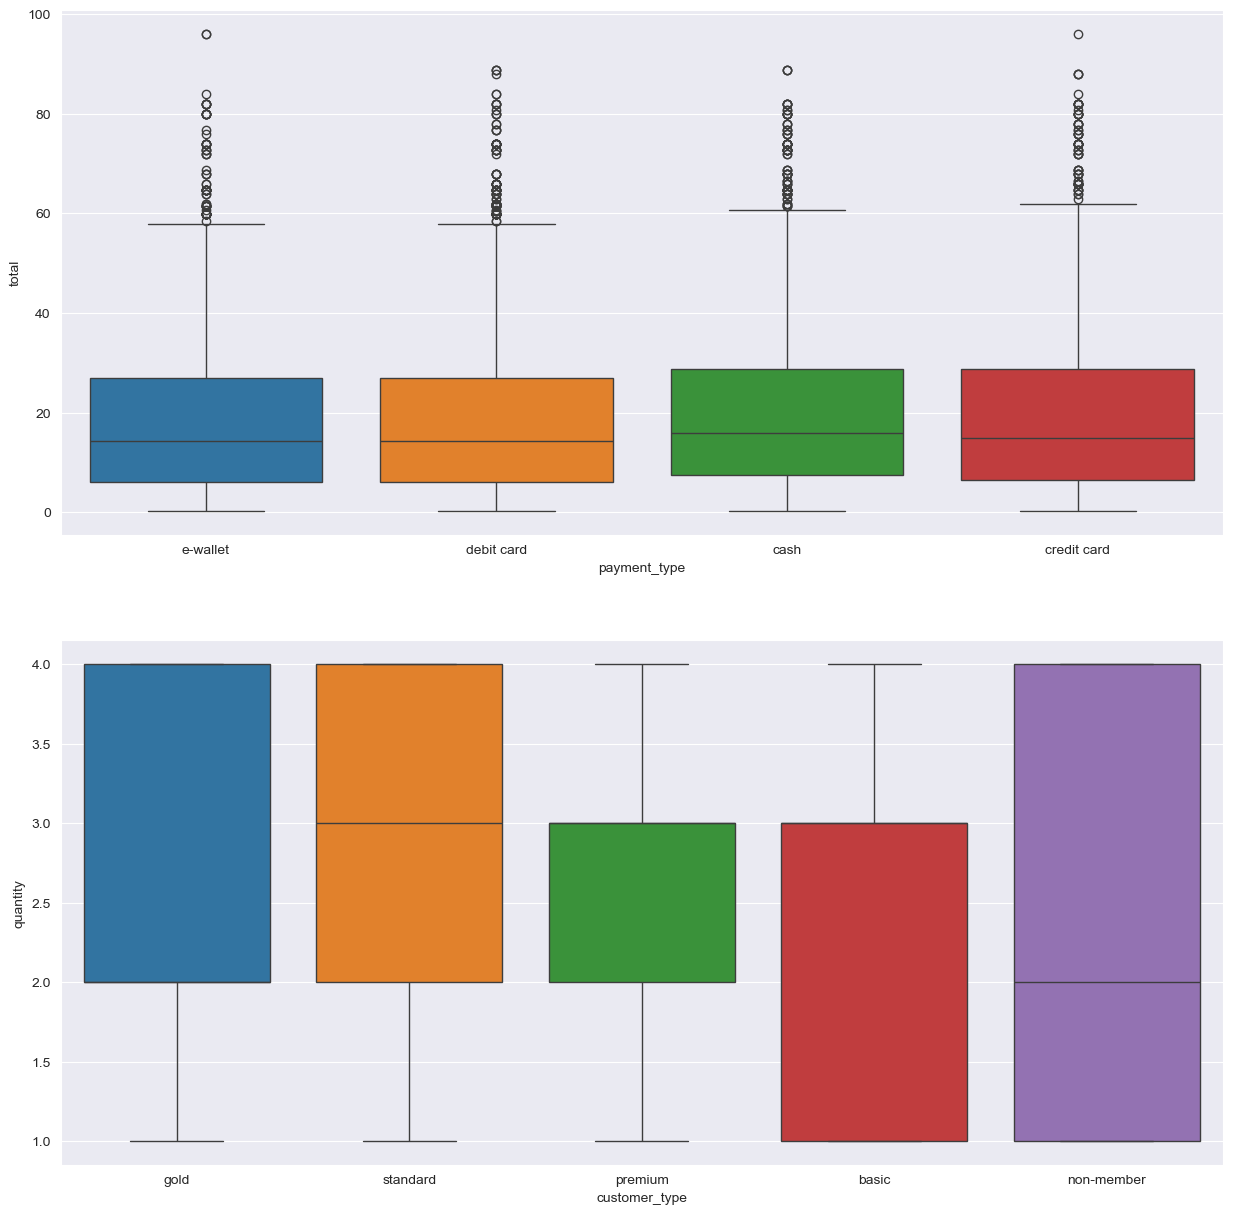

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x=sales_df['payment_type'],y=sales_df['total'],hue=sales_df['payment_type'])
plt.subplot(2,1,2)
sns.boxplot(x=sales_df['customer_type'],y=sales_df['quantity'],hue=sales_df['customer_type'])


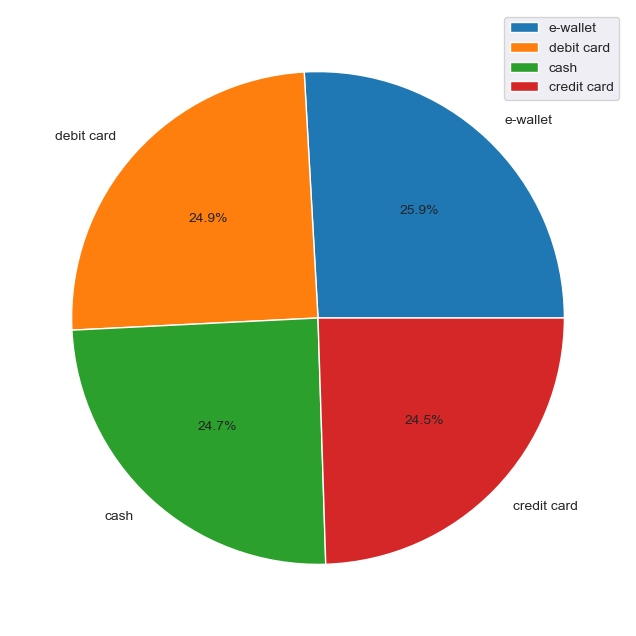

In [10]:
plt.figure(figsize=(8,8))
plt.pie(sales_df['payment_type'].value_counts(),autopct="%1.1f%%",labels=sales_df['payment_type'].unique())
plt.legend(sales_df['payment_type'].unique())
plt.show()

In [11]:
sales_df

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


In [12]:
sales_df['hour'] = sales_df['timestamp'].map(lambda x:str(x).split(' ')[1].split(':')[0])

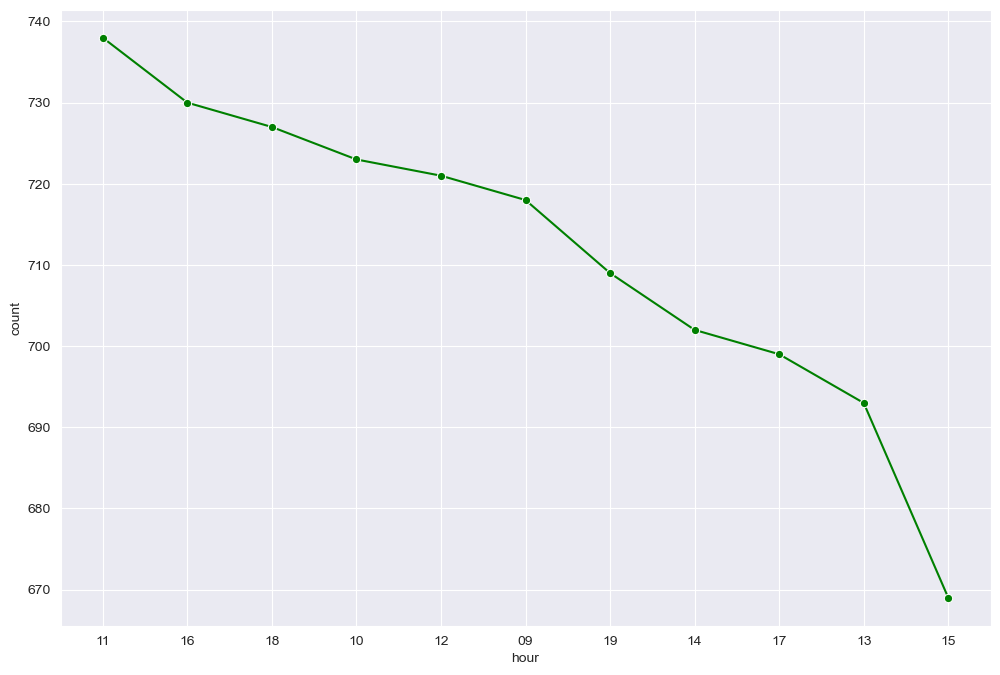

In [56]:
plt.figure(figsize=(12,8))
sns.lineplot(data=sales_df['hour'].value_counts(),marker='o',color='g')
plt.show()

In [14]:
sales_df['category'].value_counts()

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64

In [15]:
sales_df.groupby('category')['quantity'].sum()

category
baby products             543
baked goods              1089
baking                    648
beverages                 776
canned foods             1082
cheese                    783
cleaning products         725
condiments and sauces     450
dairy                     950
frozen                    660
fruit                    2439
kitchen                   955
meat                      939
medicine                  602
packaged foods           1280
personal care             455
pets                      395
refrigerated items       1065
seafood                   669
snacks                    652
spices and herbs          304
vegetables               2124
Name: quantity, dtype: int64

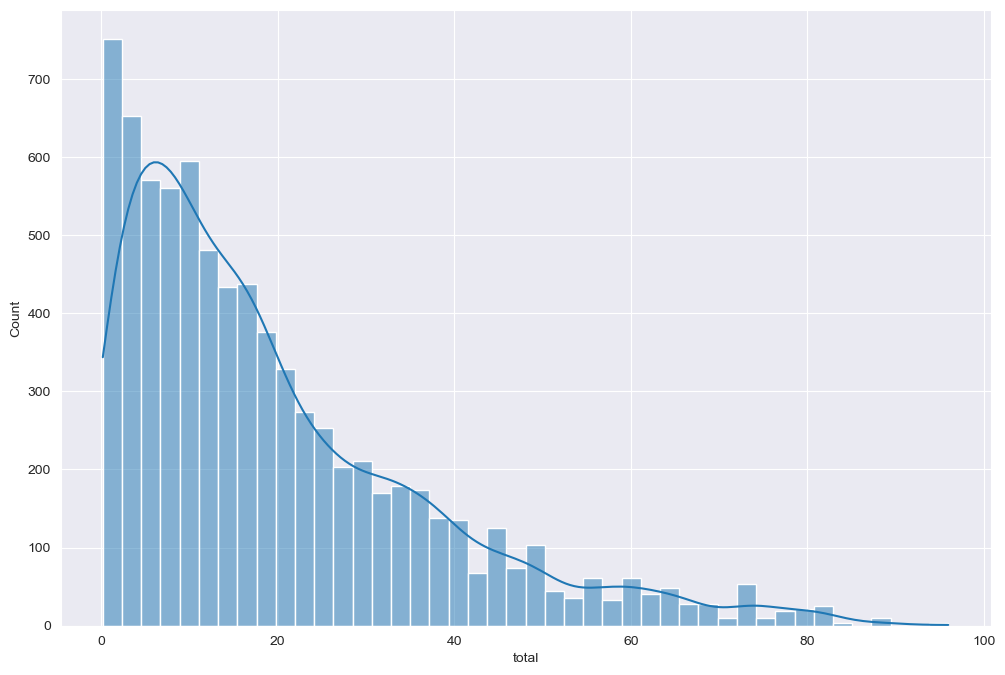

In [16]:
plt.figure(figsize=(12,8))
sns.histplot(data=sales_df, x='total', kde=True)
plt.show()

In [51]:
sales_df['total'].describe()

count    7829.000000
mean       19.709905
std        17.446680
min         0.190000
25%         6.570000
50%        14.970000
75%        28.470000
max        95.960000
Name: total, dtype: float64

In [60]:
sales_df.groupby('customer_type')['total'].sum()

customer_type
basic         29569.16
gold          29939.99
non-member    31755.24
premium       31655.68
standard      31388.78
Name: total, dtype: float64

In [69]:
len(sales_df.loc[sales_df['customer_type'] == 'non-member'])/len(sales_df['customer_type'])

0.20449610422787073

In [88]:
max_sales_time

,category,hour,count
9,baby products,18,25
12,baked goods,10,51
31,baking,18,35
35,beverages,11,33
46,canned foods,11,54
59,cheese,13,32
68,cleaning products,11,38
86,condiments and sauces,18,24
94,dairy,15,41
106,frozen,16,30
